In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
from scipy.stats import beta
from scipy.stats import norm, cauchy
from scipy.stats import norm


Q1. (Visualisation, 1.5 mark) Using scipy.stats’s rvs method, sample 30 tuples (x
1
i
, x2
i
, x3
i
, x4
i
)1≤i≤30
s.th.
x
1
i ∼ Normal(0, 1)
x
2
i ∼ Normal(2, 4)
x
3
i ∼ Uniform(0, 1)
x
4
i = x
3
i
· z where z ∼ Uniform(0, 1)
Using one of the visualisation techniques discussed in the lectures, plot this 4-D data. (Hint: you may
find that you need to adjust some parameter(s) for your plot to be legible; if so please do it.). The four
dimensions are not all independent of one another. How does this manifest itself on your plot?


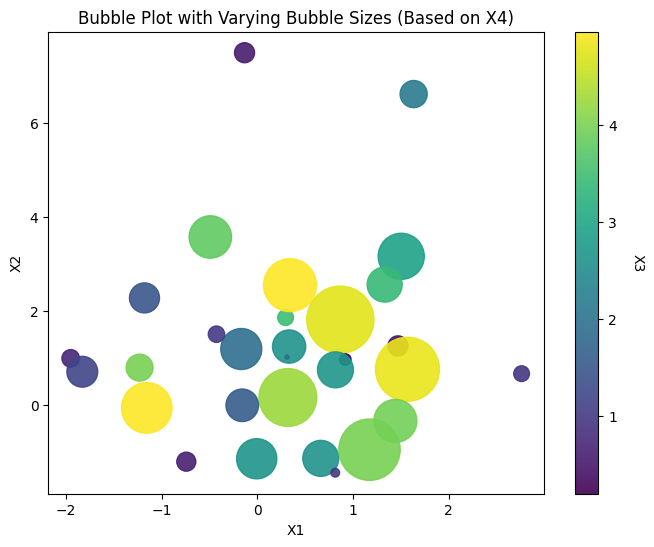

In [17]:
n_samples = 30

x1 = norm.rvs(loc=0, scale=1, size=n_samples)
x2 = norm.rvs(loc=2, scale=2, size=n_samples)
x3 = uniform.rvs(loc=0, scale=5, size=n_samples)
z = uniform.rvs(loc=0, scale=5, size=n_samples)
x4 = x3 * z

bubble_size = 100 * x4 

plt.figure(figsize=(8, 6))


scatter = plt.scatter(x1, x2, c=x3, s=bubble_size, cmap='viridis', alpha=0.9)


cbar = plt.colorbar(scatter)
cbar.set_label('X3', rotation=270, labelpad=20)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Bubble Plot with Varying Bubble Sizes (Based on X4)')

plt.show()





#As we know x4 = x3 * z this manifest the dependency between x3 and x4 and the value of x3 is directly influencing the value of x4.


Q2. (Visualisation, 1.5 mark) Display a QQ plot for the following probability measures: the standard normal
Normal(0, 1) on the x-axis and the standard Cauchy distribution Cauchy(0, 1) on the y-axis. What does
the QQ plot tell us about the tails of these distributions?

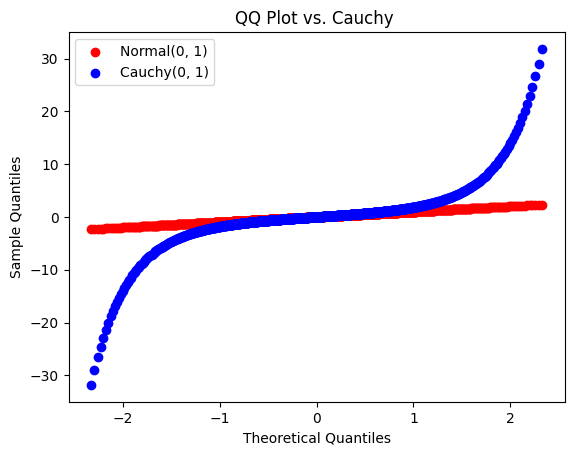

In [19]:

sample_size = 1000
std_normal_samples = norm.rvs(loc=0, scale=1, size=sample_size)
cauchy_dist_samples = cauchy.rvs(loc=0, scale=1, size=sample_size)

std_normal_samples.sort()
cauchy_dist_samples.sort()


std_normal_quantiles = norm.ppf(np.linspace(0.01, 0.99, sample_size))
cauchy_quantiles = cauchy.ppf(np.linspace(0.01, 0.99, sample_size))

plt.scatter(std_normal_quantiles, std_normal_quantiles, color='red', label='Normal(0, 1)')

plt.scatter(std_normal_quantiles, cauchy_quantiles, color='blue', label='Cauchy(0, 1)')


plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('QQ Plot vs. Cauchy ')
plt.legend()

plt.show()


#This QQ plot shows the diffrence the talils of between standard normal distribution and cauchy distribution,cauchy distributuon has heavy tails thats why the QQ plot is arced. 

Q3(Independent sum of two probability measures, 3 marks) Recall from the lectures that if we have
two probability measures P1 and P2 with respective densities f1 and f2, then the density of the sum1
P1 + P2 is given by the convolution of the two densities, viz.
f1+2(t) = Z ∞
−∞
f1(x)f2(t − x) dx.
In this question we consider the sum of Beta (2, 8) + Beta (8, 2). What is the support of Beta (2, 8)? What
is the support of Beta (8, 2)? Therefore, what is the support of Beta (2, 8) + Beta (8, 2)?
Write a function which implements the integrand of the integral above, that is to say that implements
f1(x)f2(t−x), where f1 is the density of Beta (2, 8) and f2 is the density of Beta (8, 2). (Hint: this function
will need two arguments.)
Next, generate 100 points (t1, . . . , t100) along the support of Beta (2, 8) + Beta (8, 2) (using numpy’s
linspace function), and using a for loop, compute the pdf f1+2(ti) at these 100 points using quad.
(Hint: the documentation of quad has an example showing how to integrate a function with two arguments
along its first argument.) Plot your result.
Finally, generate 10000 samples from Beta (2, 8), 10000 samples from Beta (8, 2), add them, and plot the
histogram of these sums along with the pdf computed in the previous step. What do you observe?


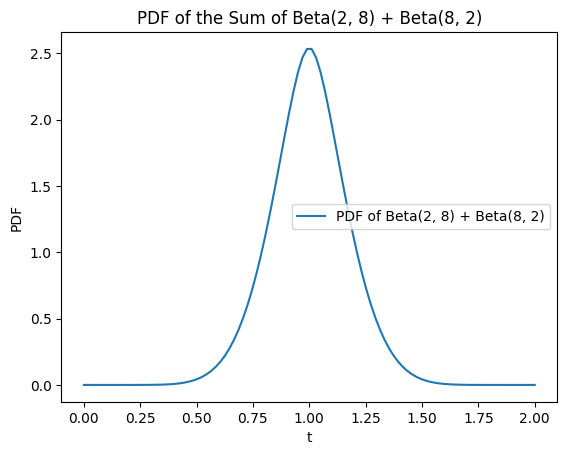

10000


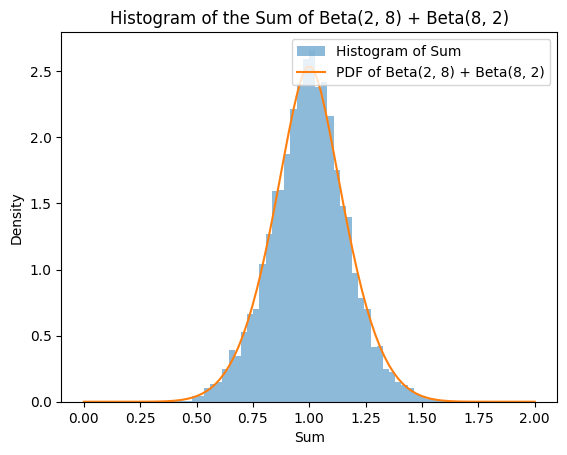

In [16]:

def integrand(x, t):
    f1 = beta.pdf(x, 2, 8)
    f2 = beta.pdf(t - x, 8, 2)
    return f1 * f2


import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

t_values = np.linspace(0, 2, 100)

pdf_values = [quad(integrand, 0, 2, args=(t,))[0] for t in t_values]

plt.plot(t_values, pdf_values, label='PDF of Beta(2, 8) + Beta(8, 2)')
plt.xlabel('t')
plt.ylabel('PDF')
plt.title('PDF of the Sum of Beta(2, 8) + Beta(8, 2)')
plt.legend()
plt.show()


Beta1 = np.random.beta(2, 8, 10000)
Beta2 = np.random.beta(8, 2, 10000)
sum_Betas = Beta1 + Beta2
print(len(sum_Betas))
plt.hist(sum_Betas, bins=50, density=True, alpha=0.5, label='Histogram of Sum')
plt.plot(t_values, pdf_values, label='PDF of Beta(2, 8) + Beta(8, 2)')
plt.xlabel('Sum')
plt.ylabel('Density')
plt.title('Histogram of the Sum of Beta(2, 8) + Beta(8, 2)')
plt.legend()
plt.show()


The shape of the plotted pdf and histogram showing good aggrement ths shows us that the samples we got from summing the two distribution agrres with the pdf of the sum of Beta distributions



Q4. (Sample mean process and sample mean distribution, 4 marks)
• Write a function called sample_mean taking as inputs two integers m and n. The function should
return an array of length n containing samples each obtained by taking m samples from the standard normal distribution and computing their sample mean. Call sample_mean(m=10, n=10000),
sample_mean(m=100, n=10000) , and sample_mean(m=1000, n=10000) and plot a histogram for
each of these outputs.
• By solving the first question of the Theory part, write a class called sample_mean_distribution
whose constructor takes an integer m as input and implements the probability measure
Normal(0, 1)m ≜
1
m
Xm
i=1
Normal(0, 1)
in other words, the distribution of the length-m estimator of the mean. Instantiate the objects
sample_mean_distribution(10), sample_mean_distribution(100), sample_mean_distribution(1000)
and plot their PDFs.
• Compare (a) the 3 histograms, (b) the 3 PDFs and (c) the histograms with the PDF. What conclusions
do you draw?


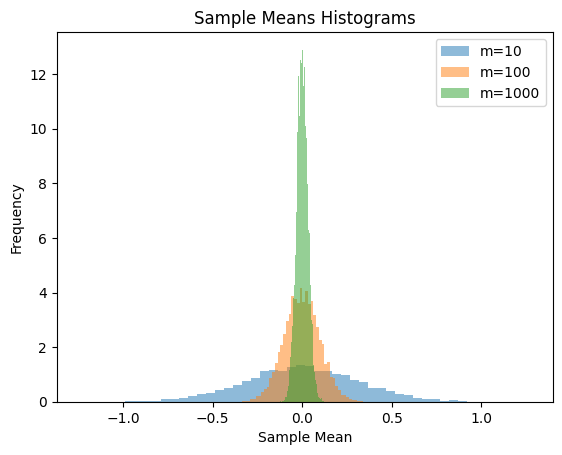

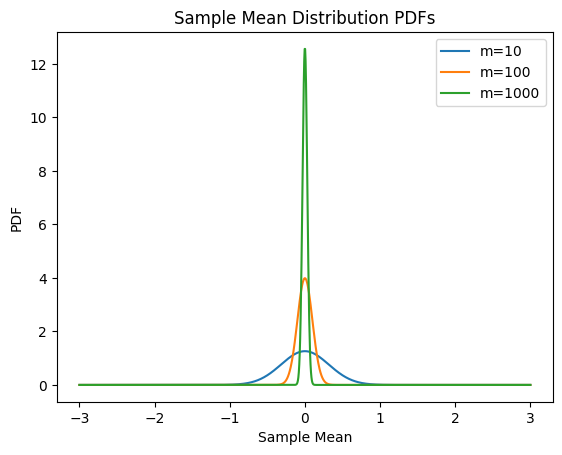

In [37]:

def sample_mean(m, n):
    sample_means = [np.mean(np.random.normal(0, 1, m)) for _ in range(n)]
    return sample_means

m_values = [10, 100, 1000]
n = 10000

for m in m_values:
    sample_means = sample_mean(m, n)
    plt.hist(sample_means, bins=50, density=True, alpha=0.5, label=f'm={m}')

plt.title('Sample Means Histograms')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

class sample_mean_distribution:
    def __init__(self, m):
        self.m = m

    def pdf(self, x):
        return norm.pdf(x, loc=0, scale=1 / np.sqrt(self.m))

m_values = [10, 100, 1000]
x = np.linspace(-3, 3, 1000)

for m in m_values:
    dist = sample_mean_distribution(m)
    plt.plot(x, dist.pdf(x), label=f'm={m}')

plt.title('Sample Mean Distribution PDFs')
plt.xlabel('Sample Mean')
plt.ylabel('PDF')
plt.legend()
plt.show()


#we can see as we increase number of sample we gets closer to mean  in first graph
#After calculating the first question we can see as m increases standerd deviation decreases